# Setup

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy

In [15]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
import visual
import preprocessing
import loader

spacy.cli.download("en_core_web_sm")  # Download the English model if not already installed

# Dataset

In [8]:
%ls ../data/

License.txt             Sentences_50Agree.txt   Sentences_75Agree.txt
README.txt              Sentences_66Agree.txt   Sentences_AllAgree.txt


In [22]:
DATA_PATH = "../data/Sentences_50Agree.txt"

In [530]:
with open(DATA_PATH, 'r', encoding='latin1') as f:
    lines = [line.strip() for line in f]
len(lines)

4846

In [532]:
missing_labels = [line for line in lines if '@' not in line]
print(f"Skipped {len(missing_labels)} lines without labels.")

Skipped 0 lines without labels.


In [534]:
lines[591]

'( ADP News ) - Dec 11 , 2008 - Finnish construction and engineering company Outotec Oyj ( OMX : OTE1V ) said today it won a EUR 28 million ( USD 36.8 m ) order to expand the phosphate concentrator in Siilinjarvi of Norwegian minera@positive'

In [536]:
sentences = []
for line in lines:
    sentences.append(line.split("@"))

In [538]:
len(sentences)

4846

In [540]:
df = pd.DataFrame(sentences, columns=["text","label"])
df["text"][591]

'( ADP News ) - Dec 11 , 2008 - Finnish construction and engineering company Outotec Oyj ( OMX : OTE1V ) said today it won a EUR 28 million ( USD 36.8 m ) order to expand the phosphate concentrator in Siilinjarvi of Norwegian minera'

In [542]:
df.head()

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


In [544]:
df.sample()["text"].values

array(['In the end , Sanoma News wants to secure its foundation with the savings .'],
      dtype=object)

# Load Data

In [63]:
DATA_PATH = "../data/Sentences_50Agree.txt"

In [65]:
df = loader.load_data(DATA_PATH, "text", "label")

Skipped 0 lines without labels.


In [67]:
df.head()

,text,label
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


# Task 1: : Extract insights from data 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4846 non-null   object
 1   label   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [33]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [35]:
df["label"].value_counts()

label
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

## Distribution 

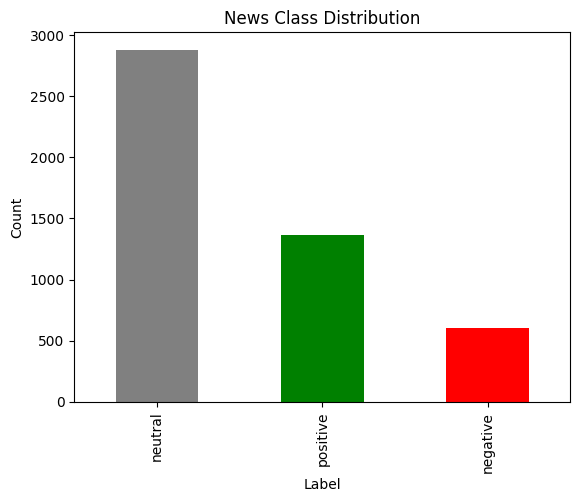

In [38]:
visual.data_distribution_per_class(df)

<Axes: title={'center': 'News Class Distribution'}, xlabel='Label', ylabel='Count'>

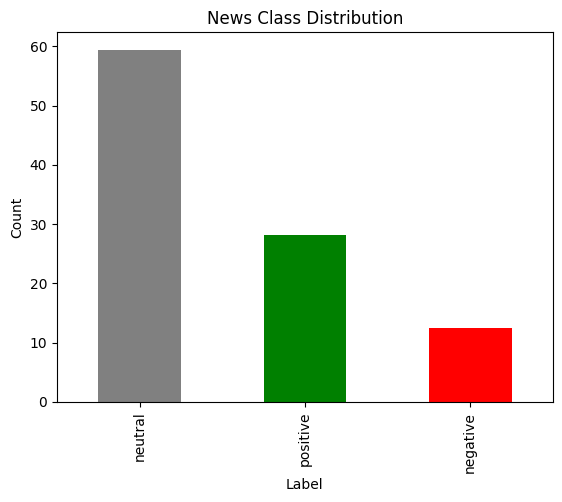

In [40]:
bar_colors = ['gray',  'green', 'red']
df["label"].value_counts(normalize=True).mul(100).round(2).plot.bar(xlabel="Label", ylabel="Count", color=bar_colors, title='News Class Distribution')

## Identify sentences containing new line characters 

In [36]:
df[df["text"].str.contains('\n')]

,text,label


## Length Distribution by Class

In [57]:
df['word_count_before'] = df["text"].apply(lambda x: len(x.split()))
df = df[['text', 'label', 'word_count_before']]

In [59]:
df

,text,label,word_count_before
0,"According to Gran , the company has no plans t...",neutral,25
1,Technopolis plans to develop in stages an area...,neutral,31
2,The international electronic industry company ...,negative,36
3,With the new production plant the company woul...,positive,33
4,According to the company 's updated strategy f...,positive,41
...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative,26
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral,30
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative,23
4844,Net sales of the Paper segment decreased to EU...,negative,44


<Axes: xlabel='label', ylabel='word_count_before'>

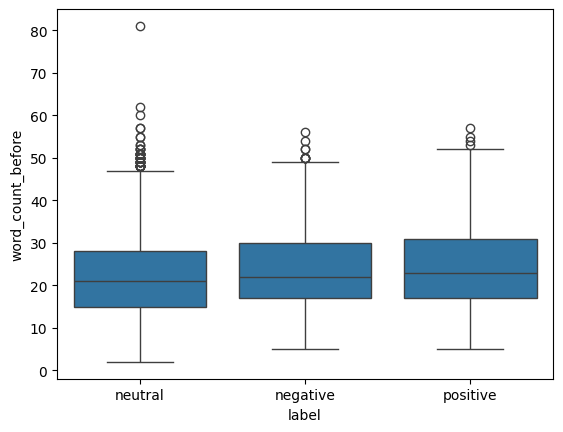

In [48]:
import seaborn as sns
sns.boxplot(x='label', y='word_count_before', data=df)

## Unique words

Unique words in class neutral: 9686
Unique words in class negative: 2870
Unique words in class positive: 5742
Total unique words: 12971


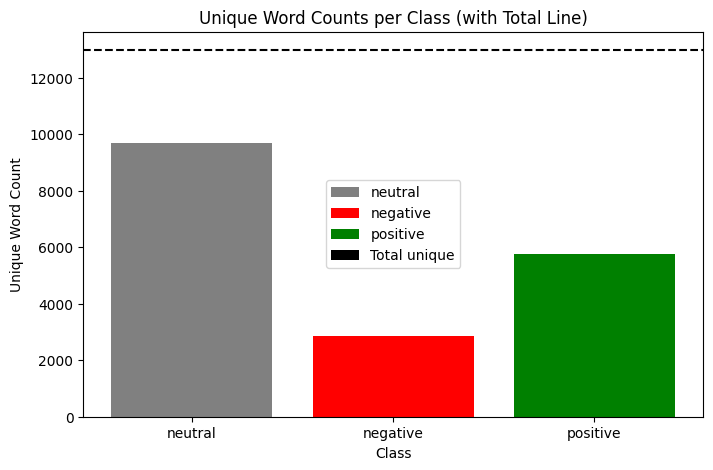

In [51]:
visual.unique_words_per_class(df, 'text')

## Most Common Words per Class

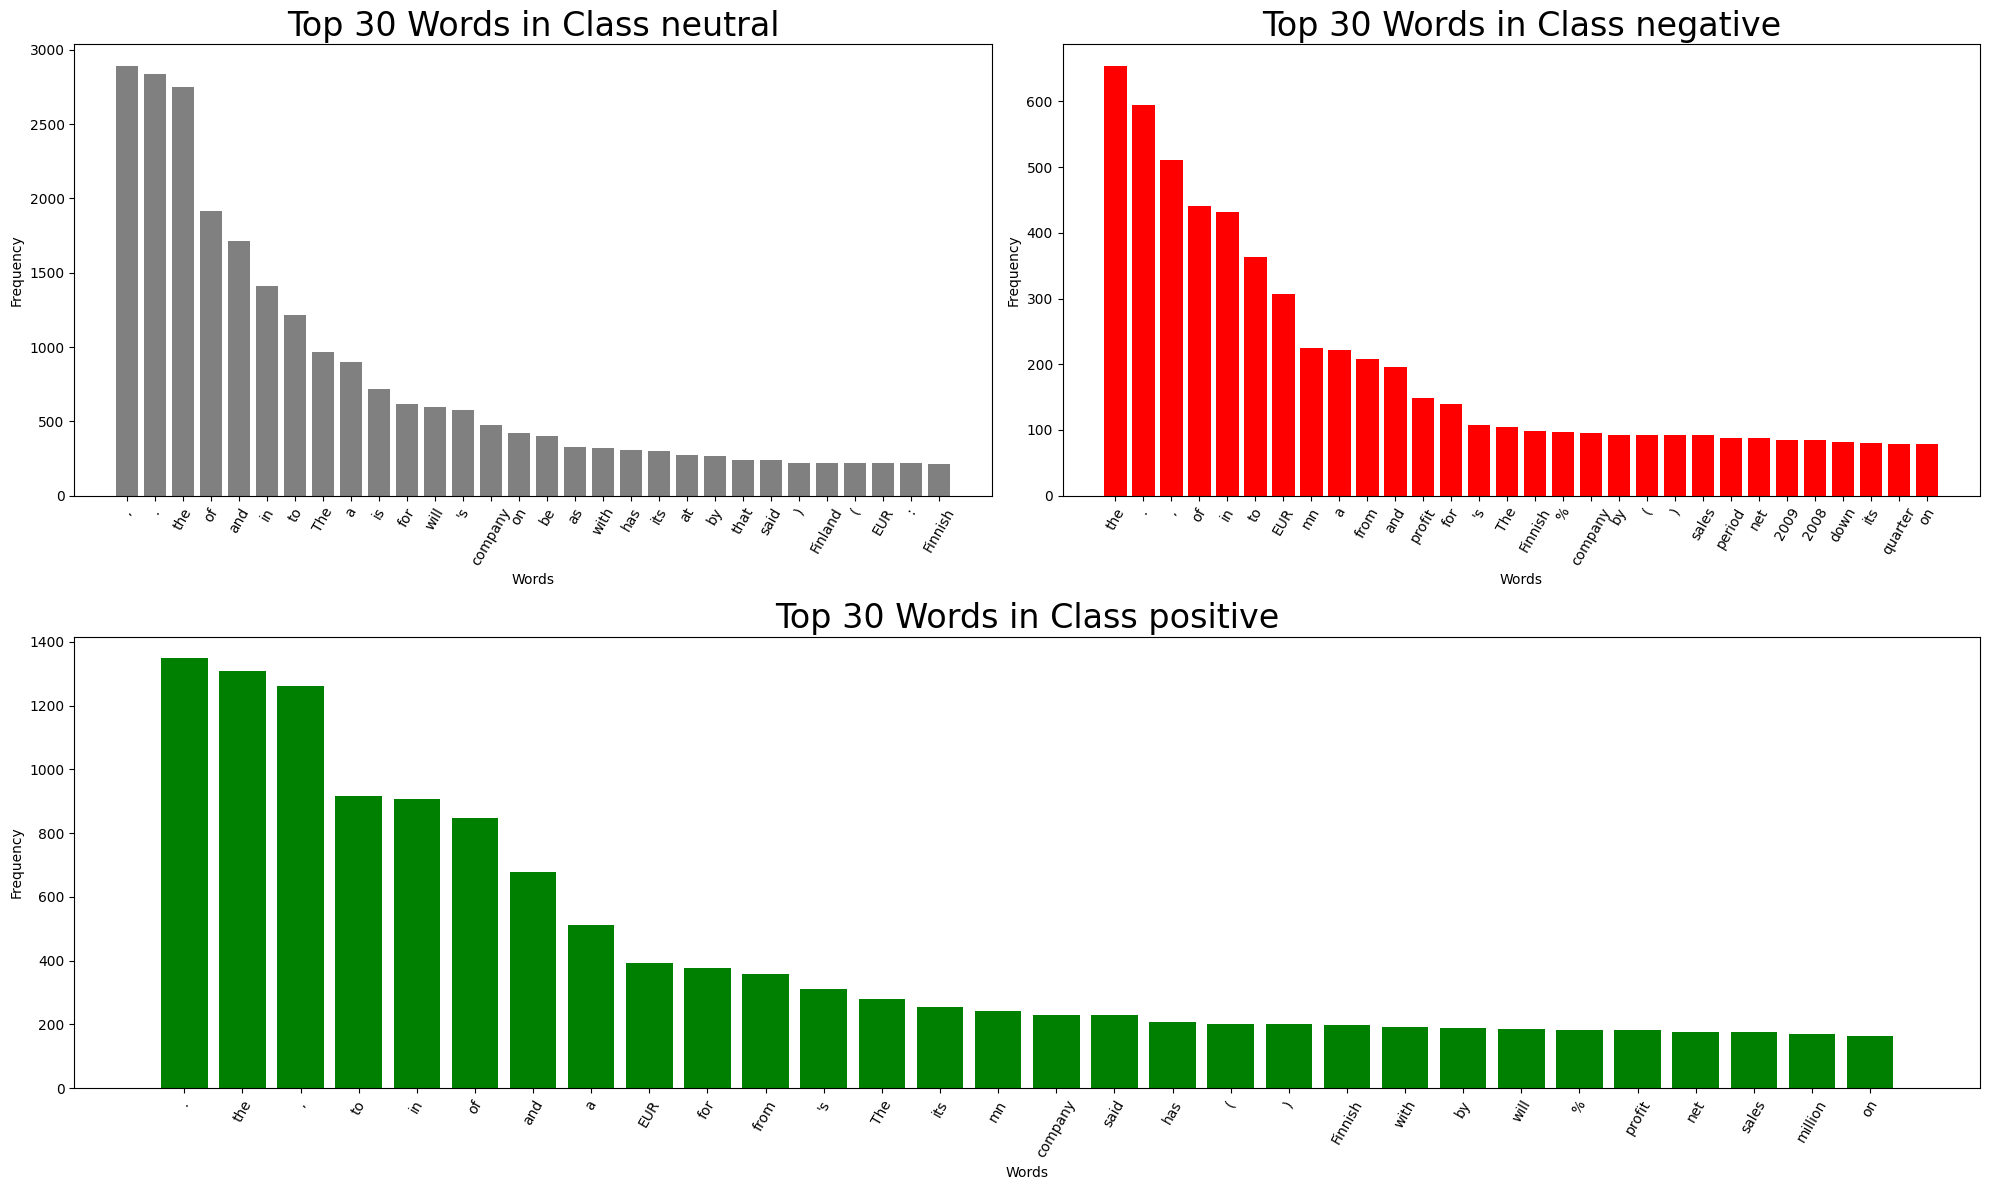

In [54]:
visual.most_common_words_per_class(df, 'text')

## Word Cloud per Class

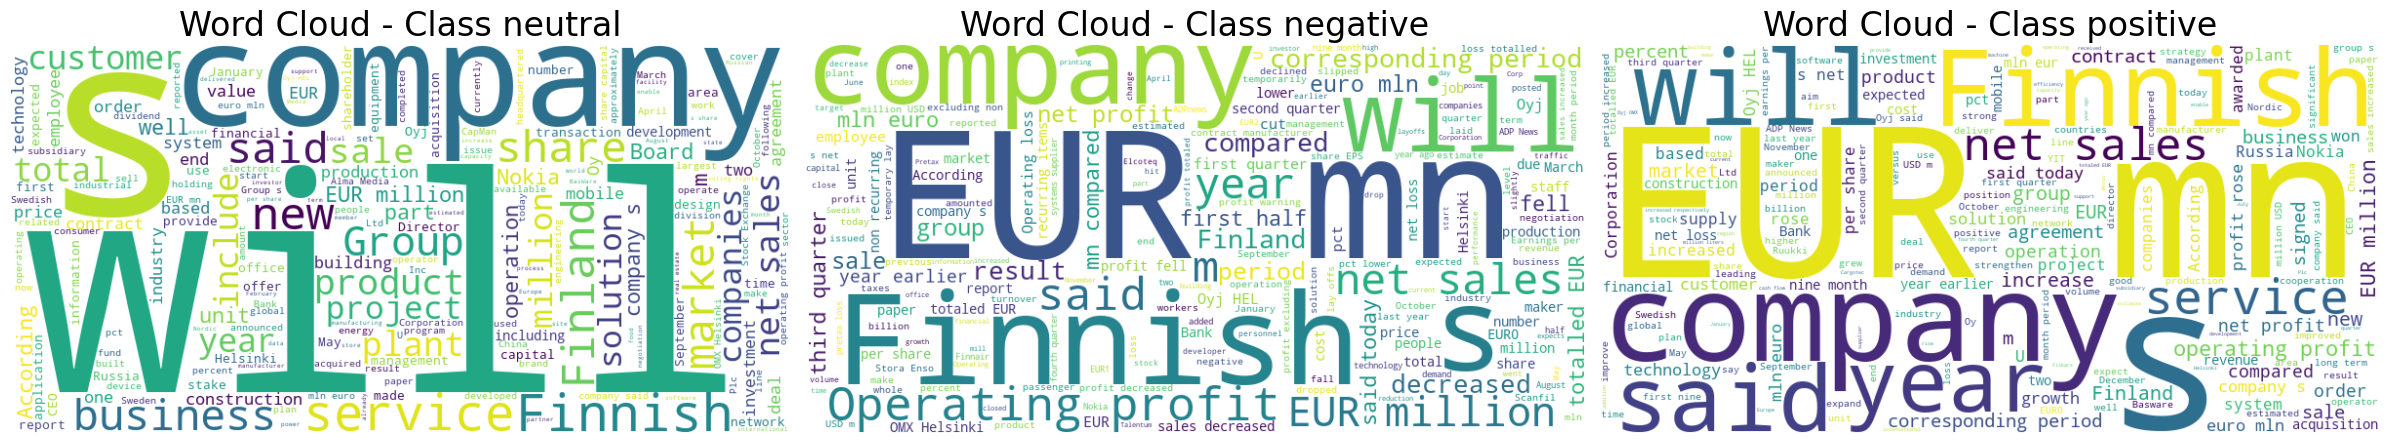

In [58]:
visual.word_cloud_per_class(df, 'text')

## Average Word Count per Class

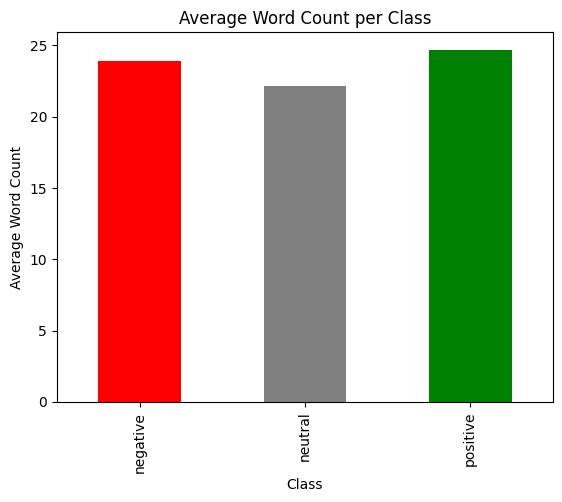

In [61]:
visual.avg_word_count_per_class(df, 'word_count_before')

# Task 2: Pre-processing 

In [64]:
text = df["text"][591]
text

'( ADP News ) - Dec 11 , 2008 - Finnish construction and engineering company Outotec Oyj ( OMX : OTE1V ) said today it won a EUR 28 million ( USD 36.8 m ) order to expand the phosphate concentrator in Siilinjarvi of Norwegian minera'

In [ ]:
df, new_col = preprocessing.process_pipeline(df, target_column="text", label_column="label", do_preprocessing=True)

In [76]:
df.groupby(["cleaned_text","label"]).size().reset_index(name='count').query('count > 1')

,cleaned_text,label,count


In [80]:
df.shape

(4820, 4)

In [70]:
df, new_col_name = preprocessing.preprocess_target_column(df, 'text')

[Text Preprocessing Summary]
- Original rows: 4846
- Removed rows (null/empty): 0
- Processed column: 'text'
- New column added: 'cleaned_text'
- Final row count: 4846
Preprocessing complete.



In [71]:
df

,text,label,cleaned_text
0,"According to Gran , the company has no plans t...",neutral,accord gran company plan production russia com...
1,Technopolis plans to develop in stages an area...,neutral,"technopolis plan develop stage area 100,000 sq..."
2,The international electronic industry company ...,negative,international electronic industry company elco...
3,With the new production plant the company woul...,positive,new production plant company increase capacity...
4,According to the company 's updated strategy f...,positive,accord company update strategy year 2009 2012 ...
...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative,london marketwatch share price end lower londo...
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral,rinkuskiai beer sale fall 6.5 cent 4.16 millio...
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative,operating profit fall eur 35.4 mn eur 68.8 mn ...
4844,Net sales of the Paper segment decreased to EU...,negative,net sale paper segment decrease eur 221.6 mn s...


In [72]:
df['word_count_before'] = df["text"].apply(lambda x: len(x.split()))
df = df[['text', f'{new_col_name}', 'label', 'word_count_before']]

In [73]:
df.head()

,text,cleaned_text,label,word_count_before
0,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,neutral,25
1,Technopolis plans to develop in stages an area...,"technopolis plan develop stage area 100,000 sq...",neutral,31
2,The international electronic industry company ...,international electronic industry company elco...,negative,36
3,With the new production plant the company woul...,new production plant company increase capacity...,positive,33
4,According to the company 's updated strategy f...,accord company update strategy year 2009 2012 ...,positive,41


In [74]:
df["text"].loc[591]

'( ADP News ) - Dec 11 , 2008 - Finnish construction and engineering company Outotec Oyj ( OMX : OTE1V ) said today it won a EUR 28 million ( USD 36.8 m ) order to expand the phosphate concentrator in Siilinjarvi of Norwegian minera'

In [75]:
df["cleaned_text"].loc[591]

'adp news dec 11 2008 finnish construction engineering company outotec oyj omx ote1v say today win eur 28 million usd 36.8 m order expand phosphate concentrator siilinjarvi norwegian minera'

In [76]:
count_duplicates_before_cleaning = df.groupby(['text','label']).size().reset_index(name='count').query('count > 1')
count_duplicates_before_cleaning

,text,label,count
345,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral,2
2583,Proha Plc ( Euronext :7327 ) announced today (...,neutral,2
2730,SSH Communications Security Corporation is hea...,neutral,2
3439,The company serves customers in various indust...,neutral,2
3733,The issuer is solely responsible for the conte...,neutral,2
4021,The report profiles 614 companies including ma...,neutral,2


In [77]:
count_duplicates_after_cleaning = df.groupby(['cleaned_text','label']).size().reset_index(name='count').query('count > 1')
count_duplicates_after_cleaning

,cleaned_text,label,count
0,,neutral,2
132,` `,neutral,2
577,ahlstrom share quote nasdaq omx helsinki,neutral,2
1019,closing transaction take place today,neutral,2
1237,company serve customer industry include proces...,neutral,2
1298,comptel corporation sami ervio president ceo d...,neutral,2
1836,financial detail available,neutral,2
1838,financial detail disclose,neutral,3
1853,financial term disclose,neutral,2
2259,glaston glass processing unit tamglass glass p...,neutral,2


In [78]:
duplicated = df[df.duplicated(subset=['label', 'cleaned_text'], keep=False)].sort_values(by=['label', 'cleaned_text'])
duplicated

,text,cleaned_text,label,word_count_before
2983,It 's not .,,neutral,4
3464,You 're not alone .,,neutral,5
2356,`` We could be there .,` `,neutral,6
3486,`` This could be us .,` `,neutral,6
2395,Ahlstrom 's share is quoted on the NASDAQ OMX ...,ahlstrom share quote nasdaq omx helsinki,neutral,11
2396,Ahlstrom 's share is quoted on the NASDAQ OMX ...,ahlstrom share quote nasdaq omx helsinki,neutral,11
2848,Closing of such transaction took place today .,closing transaction take place today,neutral,8
3780,The closing of such transaction took place tod...,closing transaction take place today,neutral,9
3205,The company serves customers in various indust...,company serve customer industry include proces...,neutral,45
3206,The company serves customers in various indust...,company serve customer industry include proces...,neutral,45


In [79]:
df = preprocessing.remove_duplicates(df, target_columns=['label', 'cleaned_text'], keep='first')
df

,text,cleaned_text,label,word_count_before
0,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,neutral,25
1,Technopolis plans to develop in stages an area...,"technopolis plan develop stage area 100,000 sq...",neutral,31
2,The international electronic industry company ...,international electronic industry company elco...,negative,36
3,With the new production plant the company woul...,new production plant company increase capacity...,positive,33
4,According to the company 's updated strategy f...,accord company update strategy year 2009 2012 ...,positive,41
...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share price end lower londo...,negative,26
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sale fall 6.5 cent 4.16 millio...,neutral,30
4843,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fall eur 35.4 mn eur 68.8 mn ...,negative,23
4844,Net sales of the Paper segment decreased to EU...,net sale paper segment decrease eur 221.6 mn s...,negative,44


In [80]:
df.groupby(['cleaned_text','label']).size().reset_index(name='count').query('count > 1')

,cleaned_text,label,count


In [81]:
df[df['cleaned_text'].str.strip() == '']

,text,cleaned_text,label,word_count_before
2983,It 's not .,,neutral,4


In [82]:
df.loc[2356]

text                 `` We could be there .
cleaned_text                            ` `
label                               neutral
word_count_before                         6
Name: 2356, dtype: object

df = df[~df['new_text'].str.strip().eq('` `')]

In [84]:
df.loc[2983]

text                 It 's not .
cleaned_text                    
label                    neutral
word_count_before              4
Name: 2983, dtype: object

In [85]:
df = preprocessing.remove_empty_or_whitespace_rows(df, 'cleaned_text')

In [86]:
df.isnull().sum()

text                 0
cleaned_text         0
label                0
word_count_before    0
dtype: int64

In [87]:
df["word_count_after"] = df["cleaned_text"].apply(lambda x: len(x.split()))
df = df[['text', 'cleaned_text', 'label', 'word_count_before', 'word_count_after']]
df

,text,cleaned_text,label,word_count_before,word_count_after
0,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,neutral,25,8
1,Technopolis plans to develop in stages an area...,"technopolis plan develop stage area 100,000 sq...",neutral,31,17
2,The international electronic industry company ...,international electronic industry company elco...,negative,36,21
3,With the new production plant the company woul...,new production plant company increase capacity...,positive,33,17
4,According to the company 's updated strategy f...,accord company update strategy year 2009 2012 ...,positive,41,24
...,...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share price end lower londo...,negative,26,17
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sale fall 6.5 cent 4.16 millio...,neutral,30,19
4843,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fall eur 35.4 mn eur 68.8 mn ...,negative,23,17
4844,Net sales of the Paper segment decreased to EU...,net sale paper segment decrease eur 221.6 mn s...,negative,44,30


In [88]:
df["word_count_before"].describe()

count    4820.000000
mean       23.140041
std         9.916527
min         3.000000
25%        16.000000
50%        21.000000
75%        29.000000
max        81.000000
Name: word_count_before, dtype: float64

In [89]:
df["word_count_after"].describe()

count    4820.000000
mean       13.177178
std         6.420822
min         1.000000
25%         8.000000
50%        12.000000
75%        17.000000
max        49.000000
Name: word_count_after, dtype: float64

In [90]:
df

,text,cleaned_text,label,word_count_before,word_count_after
0,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,neutral,25,8
1,Technopolis plans to develop in stages an area...,"technopolis plan develop stage area 100,000 sq...",neutral,31,17
2,The international electronic industry company ...,international electronic industry company elco...,negative,36,21
3,With the new production plant the company woul...,new production plant company increase capacity...,positive,33,17
4,According to the company 's updated strategy f...,accord company update strategy year 2009 2012 ...,positive,41,24
...,...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share price end lower londo...,negative,26,17
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sale fall 6.5 cent 4.16 millio...,neutral,30,19
4843,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fall eur 35.4 mn eur 68.8 mn ...,negative,23,17
4844,Net sales of the Paper segment decreased to EU...,net sale paper segment decrease eur 221.6 mn s...,negative,44,30


## Data Distribution across different Classes

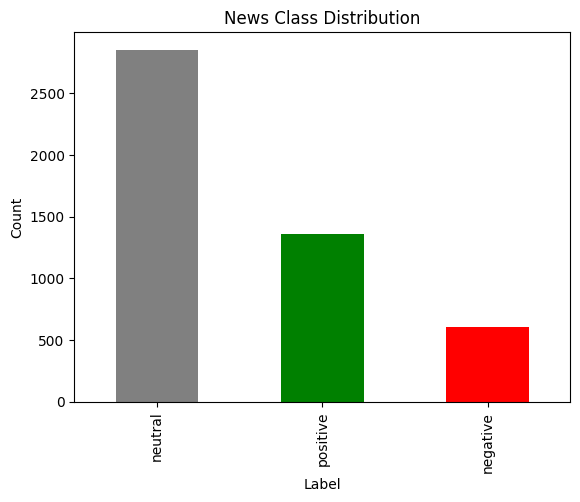

In [112]:
visual.data_distribution_per_class(df)

## Unique Words per Class

Unique words in class neutral: 7008
Unique words in class negative: 2262
Unique words in class positive: 4339
Total unique words: 9469


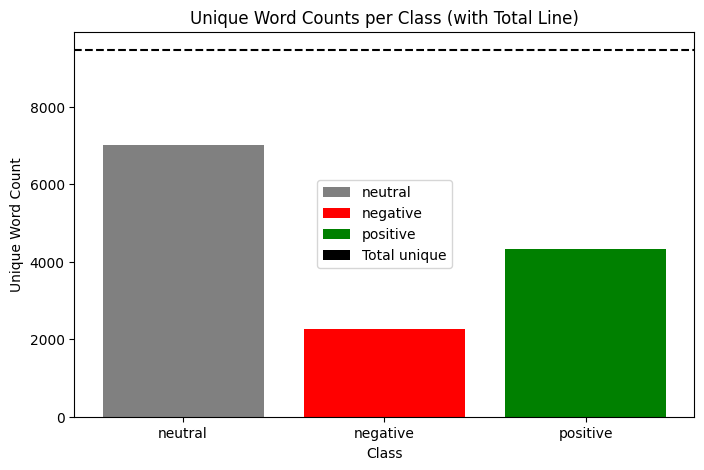

In [115]:
visual.unique_words_per_class(df, 'cleaned_text')

## Most Common Words per Class

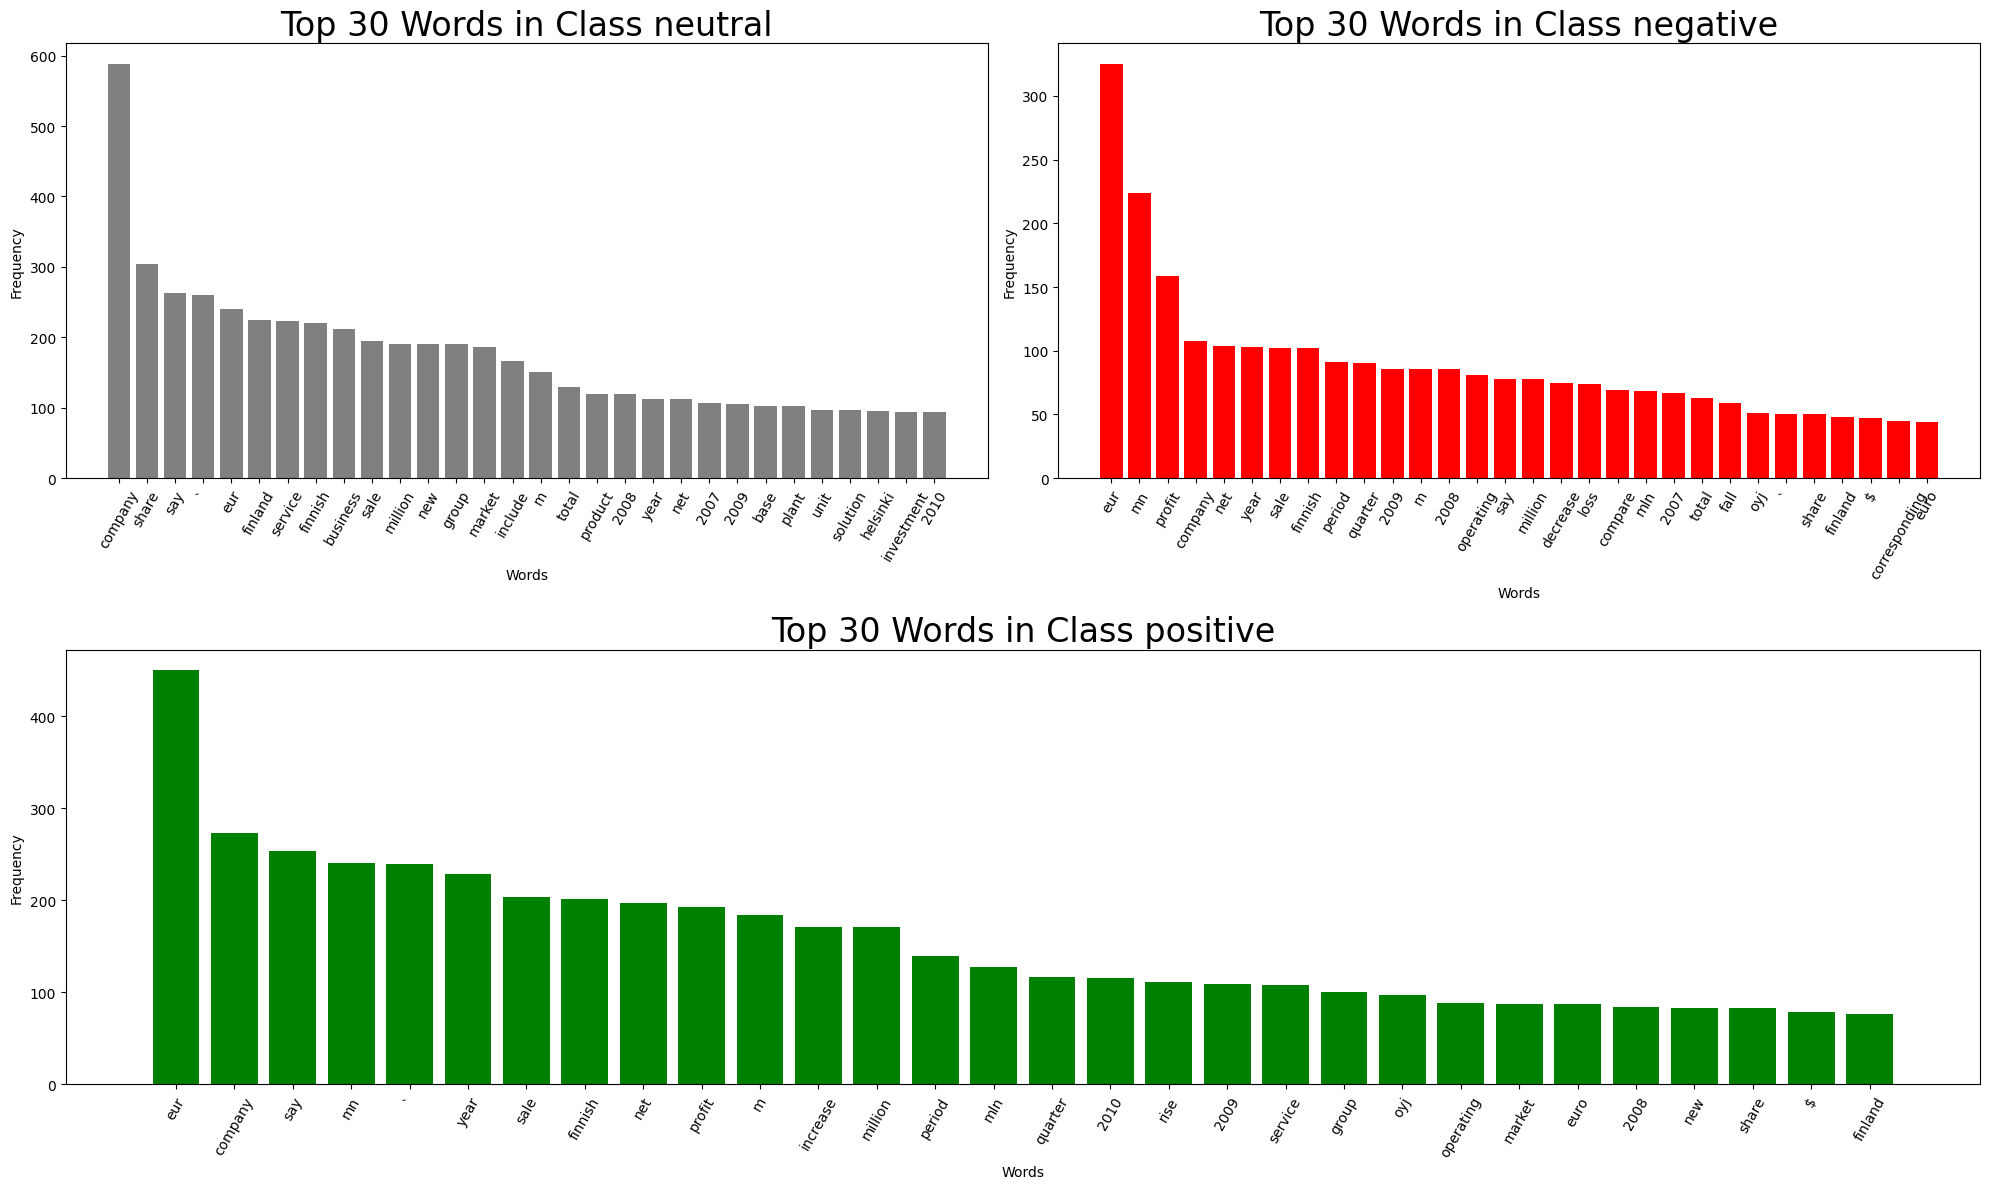

In [118]:
visual.most_common_words_per_class(df, 'cleaned_text')

## Word Cloud per Class

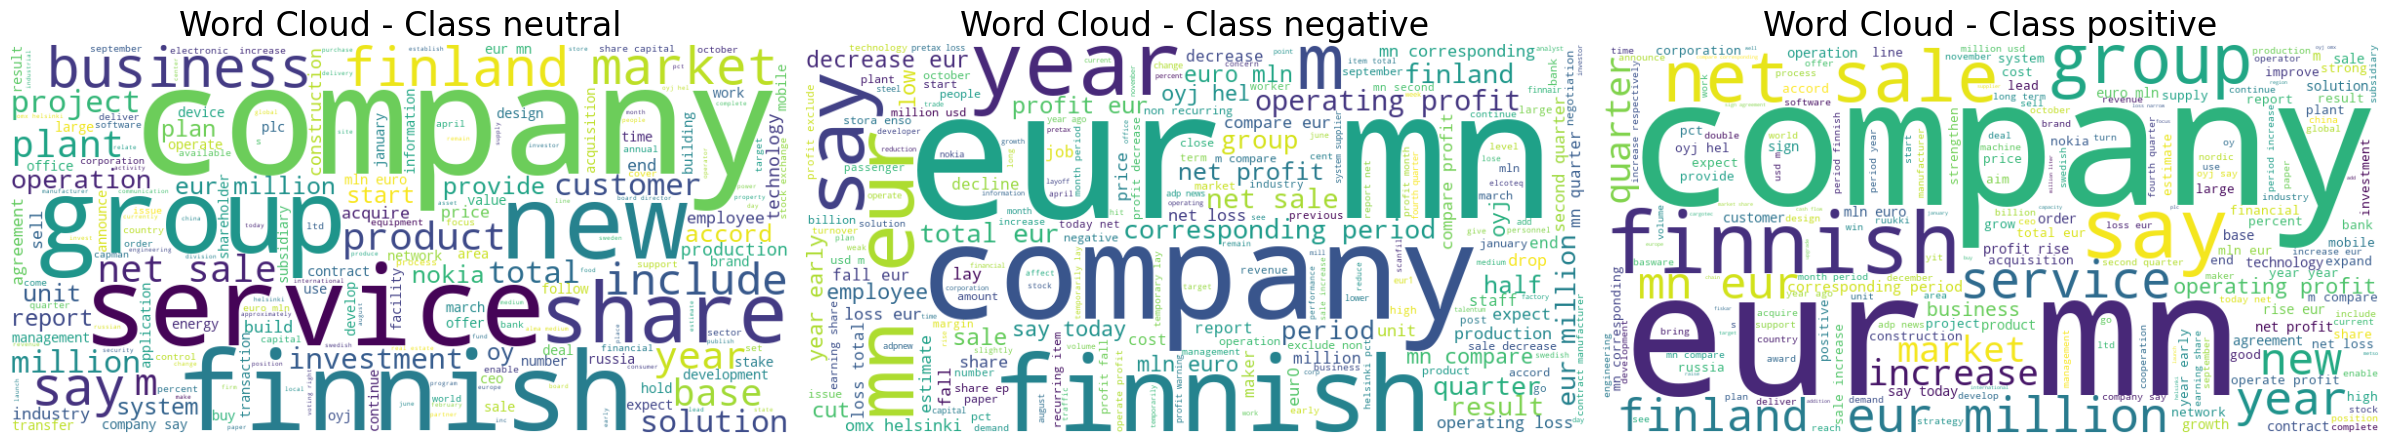

In [120]:
visual.word_cloud_per_class(df, 'cleaned_text')

## Average Word Count per Class

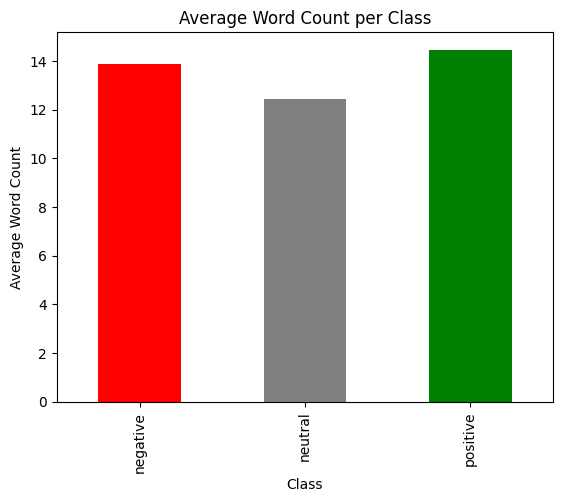

In [123]:
visual.avg_word_count_per_class(df, 'word_count_after')

In [124]:
df

,text,cleaned_text,label,word_count_before,word_count_after
0,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,neutral,25,8
1,Technopolis plans to develop in stages an area...,"technopolis plan develop stage area 100,000 sq...",neutral,31,17
2,The international electronic industry company ...,international electronic industry company elco...,negative,36,21
3,With the new production plant the company woul...,new production plant company increase capacity...,positive,33,17
4,According to the company 's updated strategy f...,accord company update strategy year 2009 2012 ...,positive,41,24
...,...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share price end lower londo...,negative,26,17
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sale fall 6.5 cent 4.16 millio...,neutral,30,19
4843,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fall eur 35.4 mn eur 68.8 mn ...,negative,23,17
4844,Net sales of the Paper segment decreased to EU...,net sale paper segment decrease eur 221.6 mn s...,negative,44,30


In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

def build_text_preprocessor(target_columns: list[str]) -> ColumnTransformer:
    """
    Creates a scikit-learn ColumnTransformer for textual preprocessing.

    The transformer:
    - Extracts and flattens the text column(s) into a 1D array.
    - Applies TF-IDF vectorization with unigrams, bigrams, and trigrams.

    Args:
        target_columns (list[str]): List of column names containing textual data.

    Returns:
        ColumnTransformer: A transformer ready to be used in a machine learning pipeline.
    """
    textual_transformer = Pipeline(steps=[
        ("flatten", FunctionTransformer(lambda x: x.iloc[:, 0].values, validate=False)),
        ("vectorizer", TfidfVectorizer(ngram_range=(1, 2)))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('textual_features', textual_transformer, target_columns)
    ], remainder="drop")

    return preprocessor

In [126]:
from sklearn.naive_bayes import MultinomialNB

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


textual_features = ["cleaned_text"]

#preprocessor = preprocessing.build_text_preprocessor(target_columns= textual_features)

preprocessor = build_text_preprocessor(target_columns= textual_features)

pipeline = Pipeline(steps=[ ("preprocessor", preprocessor), ("classifier",  SGDClassifier(random_state=42, max_iter=1000))])
#pipeline = Pipeline(steps=[("preprocessor", preprocessor),("classifier",  MultinomialNB())])


param_grid = [
        {
            "preprocessor__textual_features__vectorizer__max_features": [100, 10000, 50000, 100000],
            "classifier__alpha": [0.00001, 0.0001, 0.001, 0.01],
            "classifier__penalty": ["l2", "l1"],
            "classifier__loss": ["log_loss", "hinge"]
        }
    ]
search_cv = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
    )

In [128]:
def encode_labels(labels):
    encoded_labels = []
    for label in labels:
        if label == "neutral":
            encoded_labels.append(0)
        elif label == "negative":
            encoded_labels.append(-1)
        else: #positive
            encoded_labels.append(1)
    return encoded_labels

In [129]:
df["label"].head()

0     neutral
1     neutral
2    negative
3    positive
4    positive
Name: label, dtype: object

In [133]:
df["label"] = encode_labels(df["label"])

In [140]:
df["label"].head()

0    0
1    0
2   -1
3    1
4    1
Name: label, dtype: int64

In [142]:
df["label"].value_counts()

label
 0    2853
 1    1363
-1     604
Name: count, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(df, df["label"], test_size=0.2, random_state=42)

In [146]:
model_with_transformations = search_cv.fit(train_data, train_labels)

In [147]:
accuracy = model_with_transformations.score(test_data, test_labels)
print(f"\033[92mAccuracy on test data is {accuracy}.\033[0m")

Accuracy on test data is 0.7468879668049793.
